[View in Colaboratory](https://colab.research.google.com/github/onepixelm/Hazi-02/blob/master/Dixy.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
def diff_true_pred(y_true, y_pred):
  return abs(y_true - y_pred)

model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(100,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.001), metrics=[diff_true_pred])

In [3]:
from google.colab import files

uploaded = files.upload()
file  = open("BP_d.txt", 'r')  
head = file.readlines()[1:] 
file.close()


Saving BP_d.txt to BP_d.txt


In [4]:
head2 = [ float(s.split(';')[1]) for s in head ]
print(len(head2))

min_temp = head2[0]
max_temp = head2[0]
for t in head2:
  if t < min_temp:
    min_temp = t
  if t > max_temp:
    max_temp = t
print("Min temp: {} Max temp: {}".format(min_temp,max_temp))

head2 = [ head2[i*101:(i+1)*101] for i in range(len(head2)/101) ]
Y_temp = [ l[-1:] for l in head2 ]
#print(Y_temp)
X_temp = [ l[:-1] for l in head2 ]
#print(X_temp)

40177
Min temp: -20.6 Max temp: 33.1


In [5]:
import numpy as np
X_train = (np.asarray(X_temp[0:300]) - min_temp)/(max_temp - min_temp)
Y_train = (np.asarray(Y_temp[0:300]) - min_temp)/(max_temp - min_temp)
X_test = (np.asarray(X_temp[300:]) - min_temp)/(max_temp - min_temp)
Y_test = (np.asarray(Y_temp[300:]) - min_temp)/(max_temp - min_temp)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(300, 100)
(97, 100)
(300, 1)
(97, 1)


In [30]:
network_history = model.fit(X_train, Y_train, batch_size=40, epochs=180, verbose=1, validation_split=0.2)

Train on 240 samples, validate on 60 samples
Epoch 1/180
240/240 [==============================] - 0s 78us/step - loss: 0.0053 - diff_true_pred: 0.0580 - val_loss: 0.0058 - val_diff_true_pred: 0.0642
Epoch 2/180
240/240 [==============================] - 0s 101us/step - loss: 0.0053 - diff_true_pred: 0.0580 - val_loss: 0.0058 - val_diff_true_pred: 0.0642
Epoch 3/180
240/240 [==============================] - 0s 67us/step - loss: 0.0053 - diff_true_pred: 0.0580 - val_loss: 0.0058 - val_diff_true_pred: 0.0641
Epoch 4/180
240/240 [==============================] - 0s 68us/step - loss: 0.0053 - diff_true_pred: 0.0580 - val_loss: 0.0058 - val_diff_true_pred: 0.0641
Epoch 5/180
240/240 [==============================] - 0s 64us/step - loss: 0.0053 - diff_true_pred: 0.0579 - val_loss: 0.0058 - val_diff_true_pred: 0.0641
Epoch 6/180
240/240 [==============================] - 0s 78us/step - loss: 0.0053 - diff_true_pred: 0.0579 - val_loss: 0.0058 - val_diff_true_pred: 0.0640
Epoch 7/180
240/24

In [0]:
def plot_history(network_history):

  plt.figure()

  plt.xlabel('Epochs')

  plt.ylabel('Loss')
  plt.plot(network_history.history['loss'])
  plt.plot(network_history.history['val_loss'])
  plt.legend(['Training', 'Validation'])
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(network_history.history['diff_true_pred'])
  plt.plot(network_history.history['val_diff_true_pred'])
  plt.legend(['Training', 'Validation'])
  plt.show()

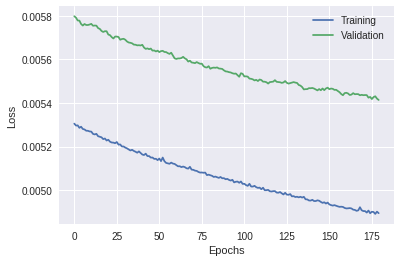

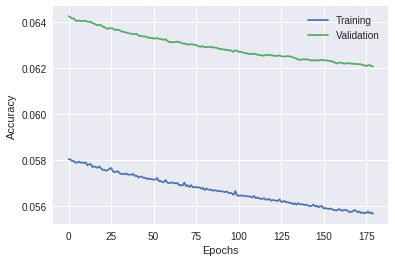

In [31]:
plot_history(network_history)

In [32]:
preds = model.predict(X_test)
print(preds.shape)

(97, 1)


In [33]:
for t in [ (preds[i][0]*(max_temp-min_temp)+min_temp, Y_test[i][0]*(max_temp-min_temp)+min_temp) for i in range(97) ]:
  print(t)

(6.121154627203943, 11.199999999999996)
(18.051569747924802, 15.399999999999999)
(12.807681983709337, 11.800000000000004)
(-6.731906285881998, 3.5)
(12.19019914865494, 9.399999999999999)
(20.04333814382553, 25.300000000000004)
(2.2279179424047477, 5.399999999999999)
(-2.4616141617298126, 0.10000000000000142)
(20.789956021308903, 16.9)
(16.328358709812164, 15.5)
(1.1284216374158866, 8.3)
(7.997274422645567, 8.599999999999998)
(24.802277332544328, 25.1)
(12.58394500017166, 4.5)
(4.084125751256941, 6.600000000000001)
(18.58392171859741, 18.800000000000004)
(18.961068379878995, 18.0)
(1.6643184602260597, 3.5)
(11.366750001907349, 12.100000000000001)
(22.861372363567355, 22.6)
(10.729572832584381, 10.7)
(0.10144676566124033, -3.6999999999999993)
(8.954560542106627, 11.099999999999998)
(22.168937110900877, 24.6)
(6.448569333553316, 3.8999999999999986)
(0.7065122157335288, 5.100000000000001)
(12.753288108110425, 14.899999999999999)
(17.57988196015358, 17.0)
(-0.204385152459146, -0.39999999999

In [0]:
import seaborn as sns
sns.set()
sns.heatmap(conf)